In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [2]:
row_data = pd.read_csv('datarumah.csv')
row_data.shape

(1010, 8)

In [3]:
row_data.describe

<bound method NDFrame.describe of         NO                                         NAMA RUMAH        HARGA  \
0        1  Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...   3800000000   
1        2  Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...   4600000000   
2        3  Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...   3000000000   
3        4           Rumah Baru Tebet, Tebet, Jakarta Selatan    430000000   
4        5  Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...   9000000000   
...    ...                                                ...          ...   
1005  1006  Rumah Strategis Akses Jalan 2mobil Di Menteng ...   9000000000   
1006  1007             Tebet Rumah Siap Huni Jln 2 Mbl Nyaman   4000000000   
1007  1008        Di Kebun Baru Rumah Terawat, Area Strategis   4000000000   
1008  1009  Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...  19000000000   
1009  1010                Dijual Rumah Kokoh Di Gudang Peluru  10500000000   

       LB   LT  KT  KM  GRS  

In [4]:
data = row_data.dropna(axis=0)
data.describe()

,NO,HARGA,LB,LT,KT,KM,GRS
count,1010.000000,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,505.500000,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,291.706188,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,1.000000,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,253.250000,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,505.500000,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,757.750000,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,1010.000000,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


In [5]:
print (row_data.dtypes)

NO             int64
NAMA RUMAH    object
HARGA          int64
LB             int64
LT             int64
KT             int64
KM             int64
GRS            int64
dtype: object


In [6]:
features = ['LB', 'LT', 'KT', 'KM', 'GRS']
x = data[features]
y = data['HARGA']
x.shape, y.shape

((1010, 5), (1010,))

In [7]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 70)

In [8]:
test_y.shape

(253,)

In [13]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse

model = KNN_Reg(n_neighbors = 80)

# training the model:
model.fit(train_x, train_y)
acc1 = model.score(test_x, test_y)

# test for prediction
test_predict = model.predict(test_x)
score = mse(test_predict, test_y)
print(' MSE: ', score, '\n', 'Accuracy: ', acc1)

 MSE:  2.4619955282874122e+19 
 Accuracy:  0.5648983609498834


In [14]:
def Elbow(K):
  #initiating an empy list
  test_mse =[]

  #train model for every value of K
  for i in K:
    model = KNN_Reg(n_neighbors=i)
    model.fit(train_x, train_y)
    tmp = model.predict(test_x)
    tmp = mse(tmp, test_y)
    test_mse.append(tmp)

  return test_mse

Text(0.5, 1.0, 'Elbow Curve for Test')

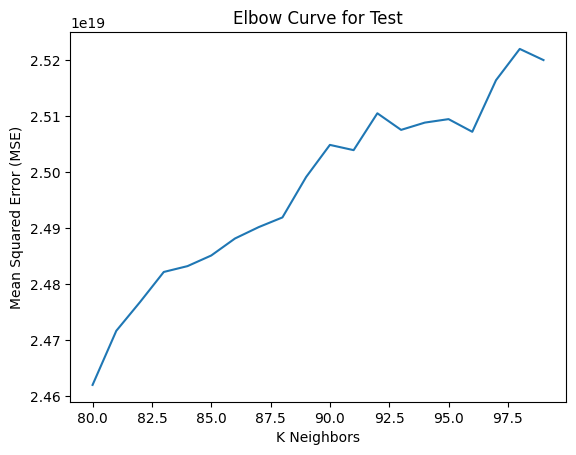

In [15]:
K = range(80, 100)
test = Elbow(K)

#plotting
plt.plot(K,test)
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for Test')

In [16]:
new_model = KNN_Reg(n_neighbors=97)

# Train model
new_model.fit(train_x, train_y)
acc2 = new_model.score(test_x, test_y)

# Prediction test
print(' Accuracy of new model (%):', acc2*100, '\n', 'Accuracy of old model (%):', acc1*100, '\n Improvement (%):', (acc2-acc1)*100)

 Accuracy of new model (%): 55.52881121120248 
 Accuracy of old model (%): 56.48983609498834 
 Improvement (%): -0.9610248837858659


In [18]:
datarumah = np.array([[450,550,110,10,3]])
prediction_old = model.predict(datarumah)
prediction_new = new_model.predict(datarumah)
print(' Hasil Prediksi harga rumah dengan old model yaitu: Rp', prediction_old * 19110*1e-6, 'Juta\n',
      'Hasil Prediksi harga rumah dengan new model yaitu: Rp', prediction_new * 19110*1e-6, 'Juta')

 Hasil Prediksi harga rumah dengan old model yaitu: Rp [3.16303942e+08] Juta
 Hasil Prediksi harga rumah dengan new model yaitu: Rp [2.975427e+08] Juta


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [19]:
datarumah = np.array([[800,900,200,20,6]])
prediction_old = model.predict(datarumah)
prediction_new = new_model.predict(datarumah)
print(' Hasil Prediksi harga rumah dengan old model yaitu: Rp', prediction_old * 19110*1e-6, 'Juta\n',
      'Hasil Prediksi harga rumah dengan new model yaitu: Rp', prediction_new * 19110*1e-6, 'Juta')

 Hasil Prediksi harga rumah dengan old model yaitu: Rp [4.30297481e+08] Juta
 Hasil Prediksi harga rumah dengan new model yaitu: Rp [4.01910882e+08] Juta


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [20]:
datarumah = np.array([[200,300,50,5,1]])
prediction_old = model.predict(datarumah)
prediction_new = new_model.predict(datarumah)
print(' Hasil Prediksi harga rumah dengan old model yaitu: Rp', prediction_old * 19110*1e-6, 'Juta\n',
      'Hasil Prediksi harga rumah dengan new model yaitu: Rp', prediction_new * 19110*1e-6, 'Juta')

 Hasil Prediksi harga rumah dengan old model yaitu: Rp [1.39706044e+08] Juta
 Hasil Prediksi harga rumah dengan new model yaitu: Rp [1.36095816e+08] Juta


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
